<a href="https://colab.research.google.com/github/AlyAbdulloh/PCVK_SEMESTER-5/blob/main/Week5/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

In [1]:
from google.colab import drive

# akses drive saya
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.



 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


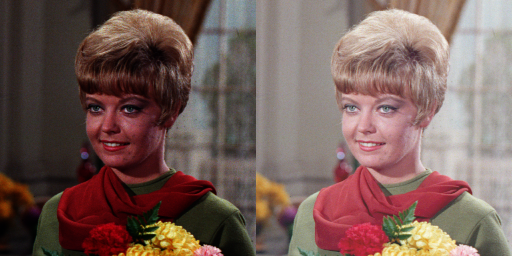

In [5]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
gamma_correction = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_correction[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,1/gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_correction))
cv2_imshow(final_frame)

2. **Buat Simulasi Image Depth**

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

 Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.



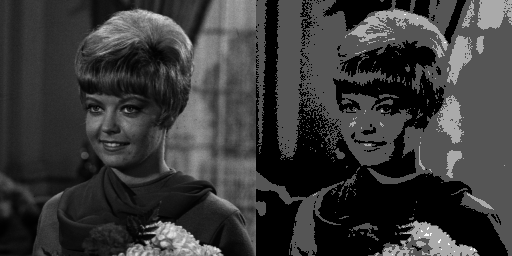

In [9]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round((original[y,x]/level))*level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. **Buat modul Average Denoising**

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Jumlah Citra di Average = 5, Nilai PSNR (dB): 27.53417969660939
Jumlah Citra di Average = 10, Nilai PSNR (dB): 27.550181235407546
Jumlah Citra di Average = 20, Nilai PSNR (dB): 27.520832562525932
Jumlah Citra di Average = 40, Nilai PSNR (dB): 27.451043118645565
Jumlah Citra di Average = 80, Nilai PSNR (dB): 27.401822066324097
Jumlah Citra di Average = 100, Nilai PSNR (dB): 27.370931279516654


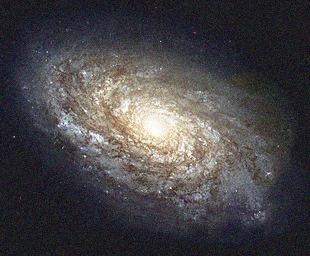

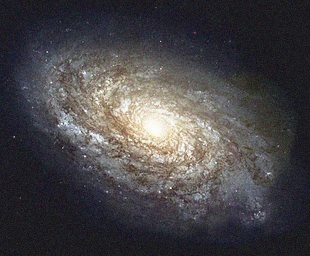

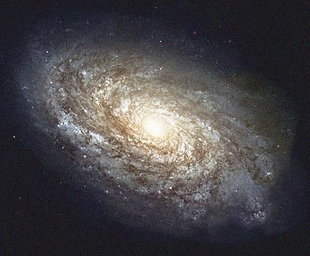

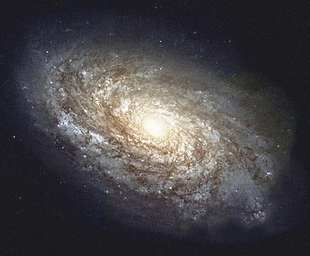

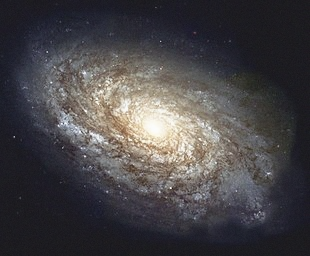

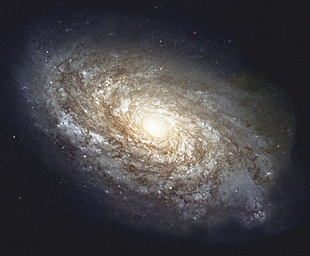

In [11]:
import glob

# citra original galaxy
original_image = cv.imread('/content/drive/MyDrive/PCVK/image/galaxy.jpg')

# jumlah citra yang akan di-average
jumlah_citra = [5,10,20,40,80,100];

# inisiasi array untuk menyimpan citra hasil penggabungan
combined_images = []

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/image/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)

# Proses penggabungan citra dengan Gaussian Noise ke citra asli untuk setiap jumlah citra
for n in jumlah_citra:
    # Mengambil n citra pertama
    noise_images_to_average = cv_img[:n]

    # Menghitung citra rata-rata dari n citra tersebut
    average_combined_image = np.mean(noise_images_to_average, axis=0).astype(np.uint8)

    # Menambahkan citra rata-rata ke dalam array
    combined_images.append(average_combined_image)

    # Hitung PSNR antara citra asli dan citra rata-rata hasil penggabungan
    mse = np.mean((original_image - average_combined_image) ** 2)
    if mse == 0:
        psnr = 100  # PSNR tak terbatas jika MSE adalah 0
    else:
        max_pixel = 255.0
        psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

    # Tampilkan atau cetak nilai PSNR
    print(f"Jumlah Citra di Average = {n}, Nilai PSNR (dB): {psnr}")

# Anda juga dapat menampilkan atau menyimpan citra hasil penggabungan untuk setiap jumlah citra
for i, image in enumerate(combined_images):
    cv2_imshow(image)


4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP),
sedangkan image paling kanan adalah hasilnya:

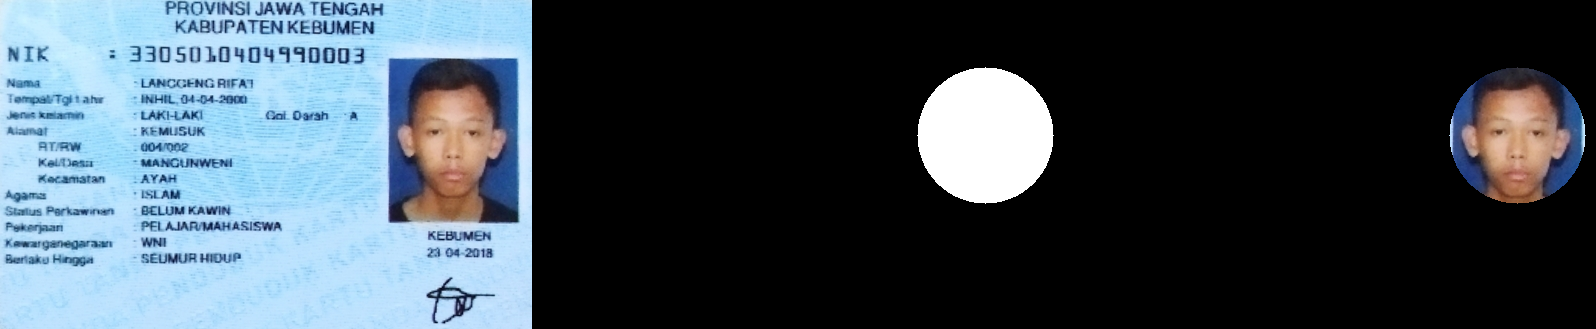

In [25]:
KTP=cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
mask = np.zeros_like(KTP)

center1 = (453, 135)
radius1 = 68

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_and(KTP, mask)

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.


5. 1. NOT (Komplemen)

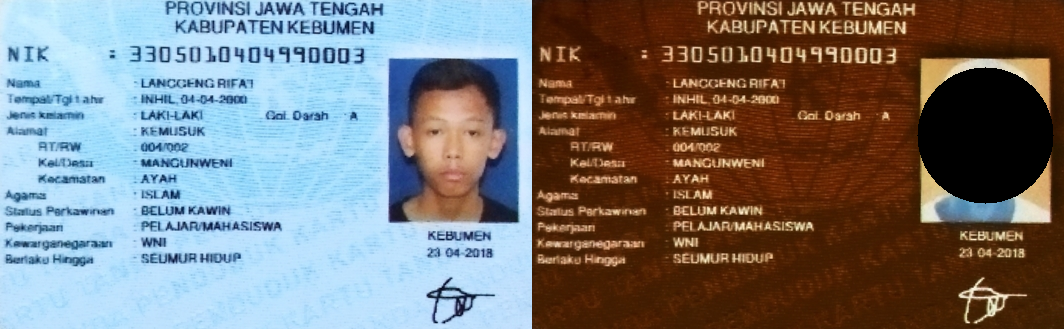

In [39]:
KTP=cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
mask = KTP.copy()

center1 = (453, 135)
radius1 = 68

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_not(mask)

final_frame = cv.hconcat((KTP,masked_image))
cv2_imshow(final_frame)

5. 2. OR (atau)

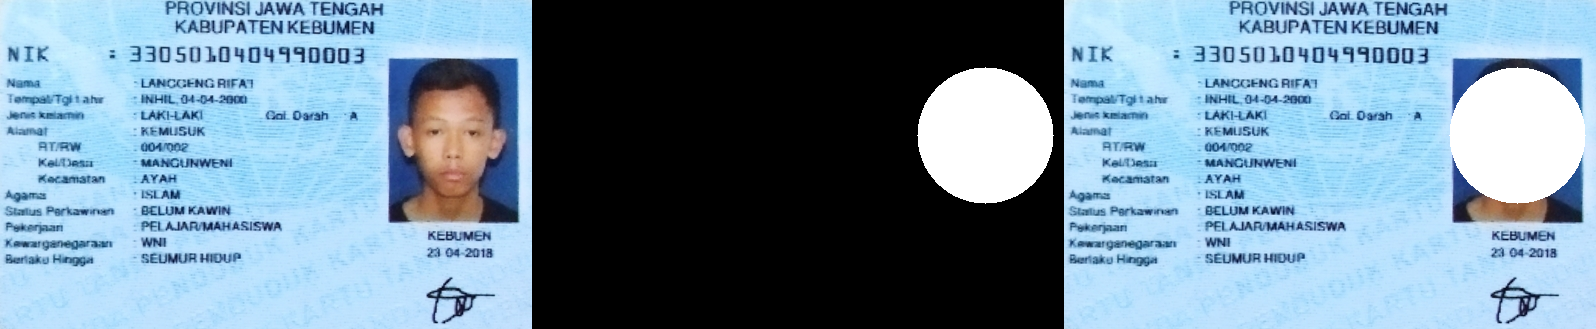

In [45]:
KTP=cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
mask = np.zeros_like(KTP)

center1 = (453, 135)
radius1 = 68

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_or(KTP, mask)

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. 3. AND (Dan)

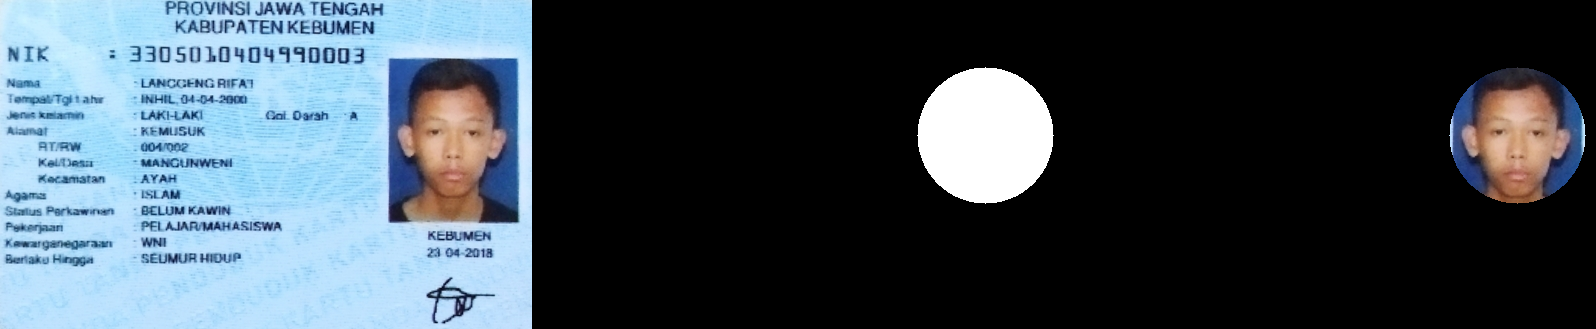

In [51]:
KTP=cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
mask = np.zeros_like(KTP)

center1 = (453, 135)
radius1 = 68

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_and(KTP, mask)

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. 4. NAND (Not And)

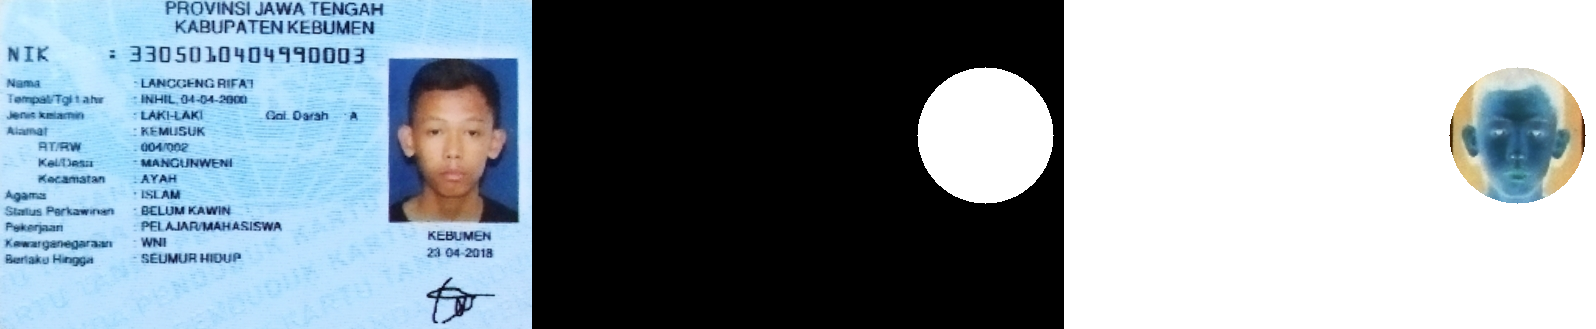

In [48]:
KTP=cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
mask = np.zeros_like(KTP)

center1 = (453, 135)
radius1 = 68

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_not(cv.bitwise_and(KTP, mask))

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

5. 5. XOR (Exclusive Or)

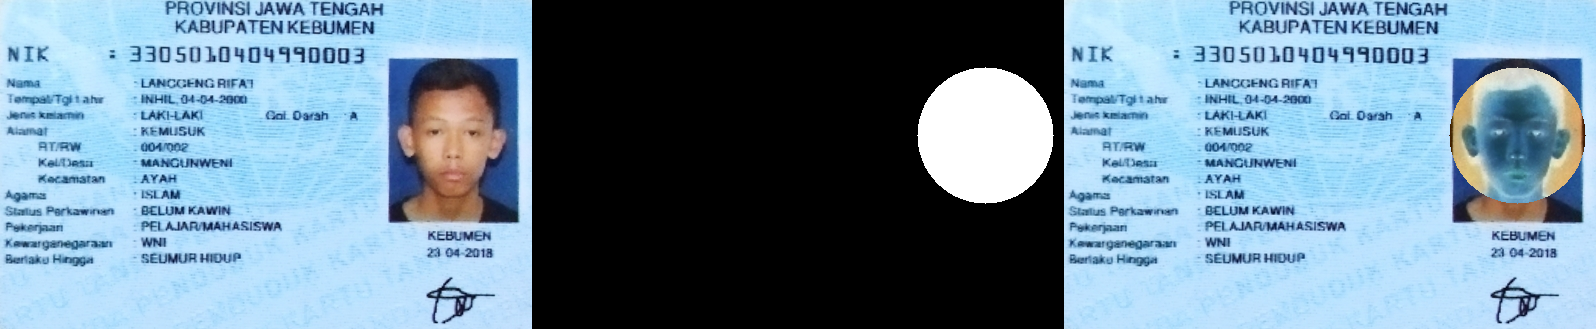

In [50]:
KTP=cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
mask = np.zeros_like(KTP)

center1 = (453, 135)
radius1 = 68

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_xor(KTP, mask)

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)